In [1]:
import torch
print("torch:", torch.__version__)
print("cuda available:", torch.cuda.is_available())
print("device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else None)

torch: 2.9.0.dev20250906+cu128
cuda available: True
device: NVIDIA GeForce RTX 5080


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
import os
HOME = os.getcwd()

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="MTS6I7fo7Sbo25WfpAFS")
project = rf.workspace("particle-tracking-velocimetry").project("dynamicmask-93zhi")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DynamicMask-1 in yolov11:: 100%|██████████| 768/768 [00:00<00:00, 2254.03it/s]


In [5]:
from ultralytics import YOLO
YOLO("yolo11s-seg.pt")  # si no existe localmente, lo descarga

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_run

In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"  # evita conflicto OpenMP en Win
os.environ["OMP_NUM_THREADS"] = "1"

from ultralytics import YOLO

MODEL_PATH = r"C:\Users\MBX\Desktop\Particle-Tracking-Velocimetry-Improving-Via-Deep-Learning\Segmentation-Models\YOLO_v11\yolo11s-seg.pt"
DATA_YAML  = r"C:\Users\MBX\Desktop\DynamicMask\TrainModels\DynamicMask-1\data.yaml"

model = YOLO(MODEL_PATH)
results = model.train(
    task="segment",
    data=DATA_YAML,
    epochs=200,
    imgsz=1024,
    device=0,
    workers=0,          # en Win/Jupyter, mejor 0 para ver errores y logs
    deterministic=True,
    plots=True,
    verbose=True,
)


New https://pypi.org/project/ultralytics/8.3.204 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.194  Python-3.11.13 torch-2.9.0.dev20250906+cu128 CUDA:0 (NVIDIA GeForce RTX 5080, 16303MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\MBX\Desktop\DynamicMask\TrainModels\DynamicMask-1\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\MBX\Desktop\Particle-Tracking-Velocimetry-

In [12]:
import glob, os
from ultralytics.utils.plotting import plot_results

base = r"C:\Users\MBX\Desktop\Particle-Tracking-Velocimetry-Improving-Via-Deep-Learning\Segmentation-Models\YOLO_v11\runs\segment"
last_train = sorted(glob.glob(os.path.join(base, "train*")), key=os.path.getmtime)[-1]
plot_results(file=os.path.join(last_train, "results.csv"))
print("Gráficas regeneradas en:", last_train)


Gráficas regeneradas en: C:\Users\MBX\Desktop\Particle-Tracking-Velocimetry-Improving-Via-Deep-Learning\Segmentation-Models\YOLO_v11\runs\segment\train


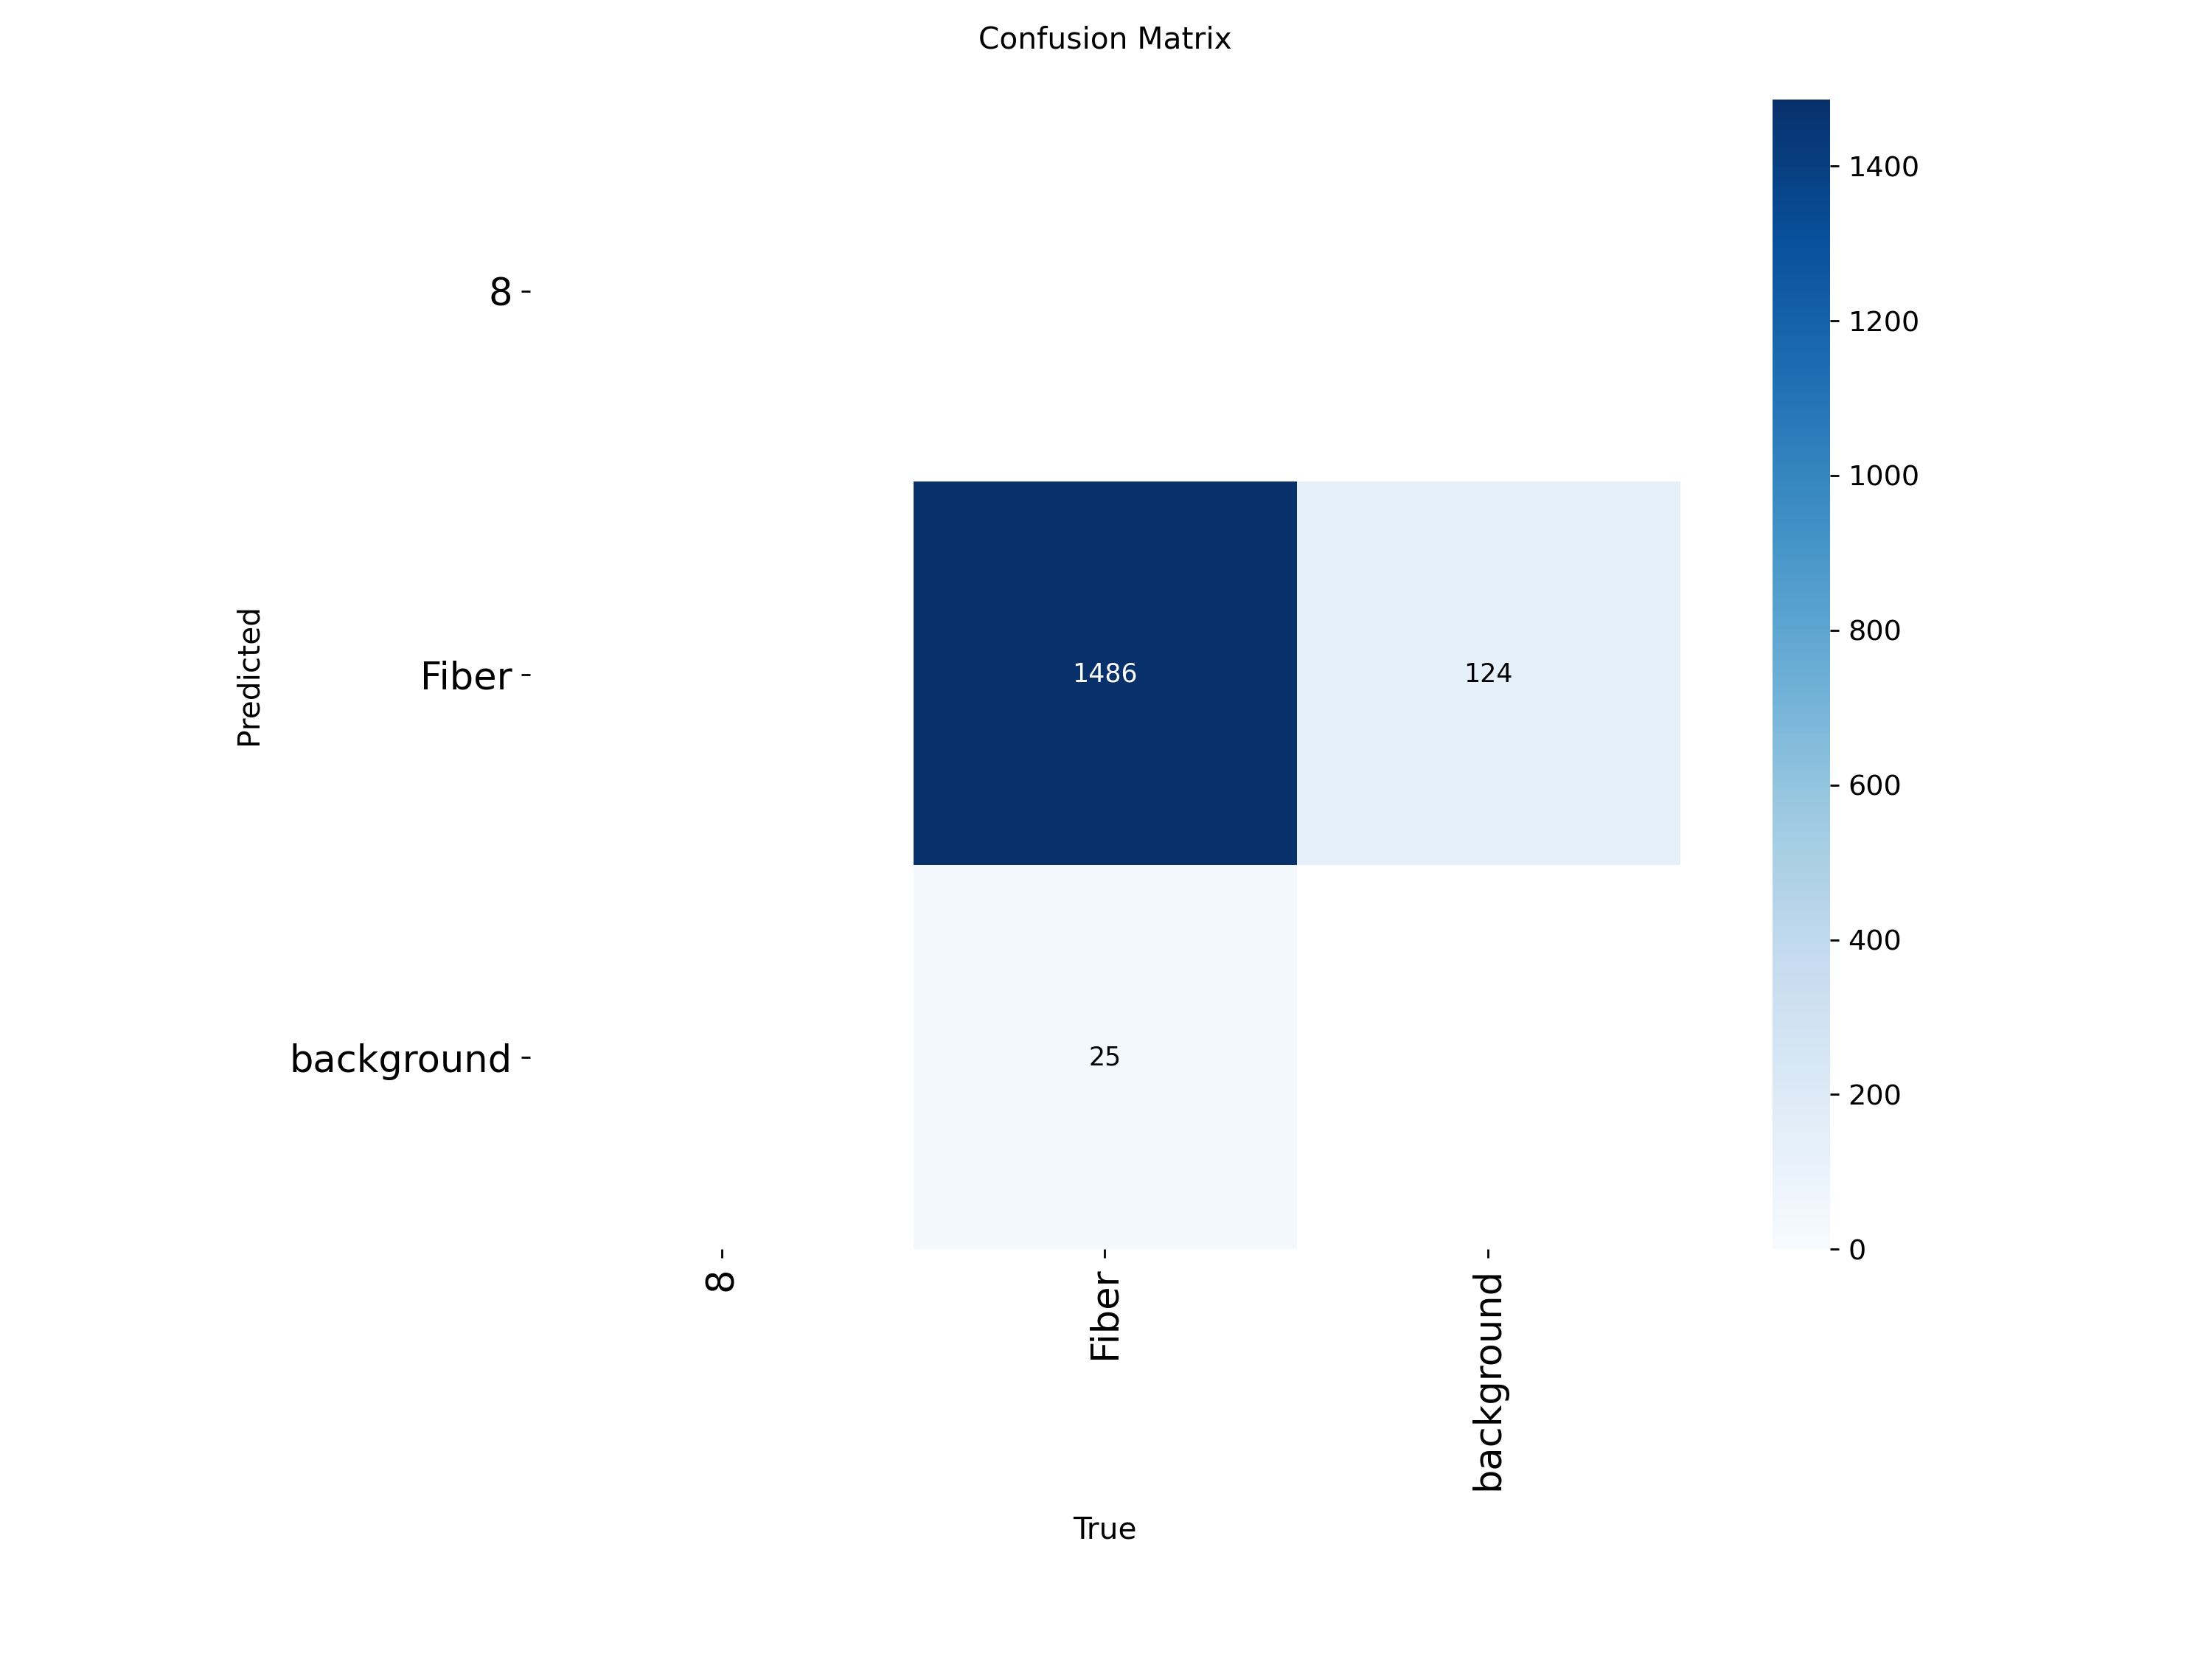

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)


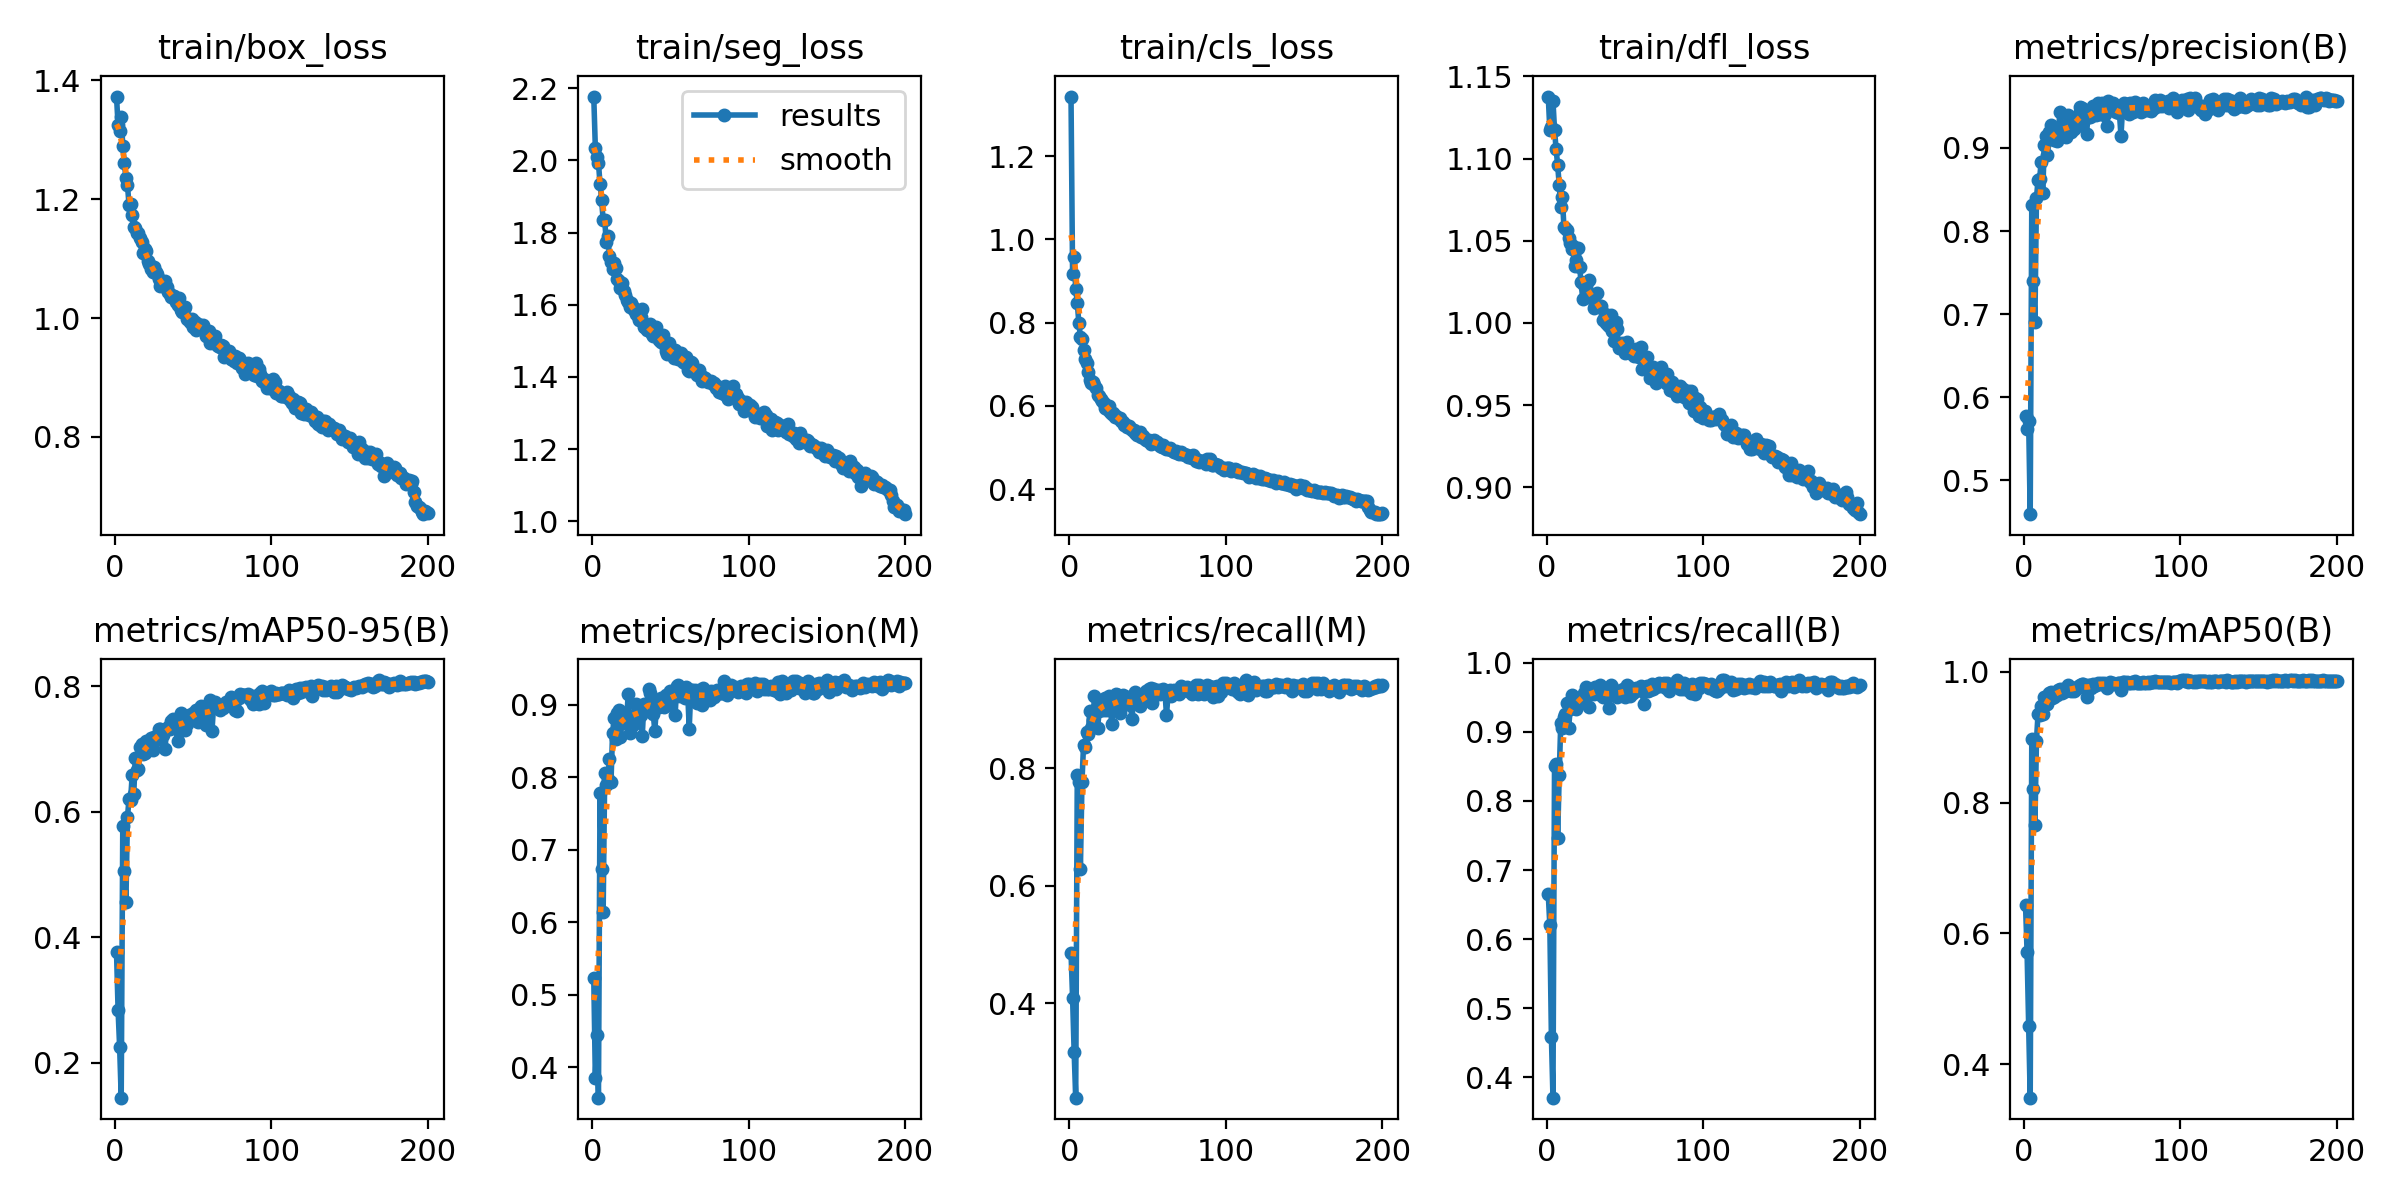

In [13]:
IPyImage(filename=f'runs/segment/train/results.png', width=600)

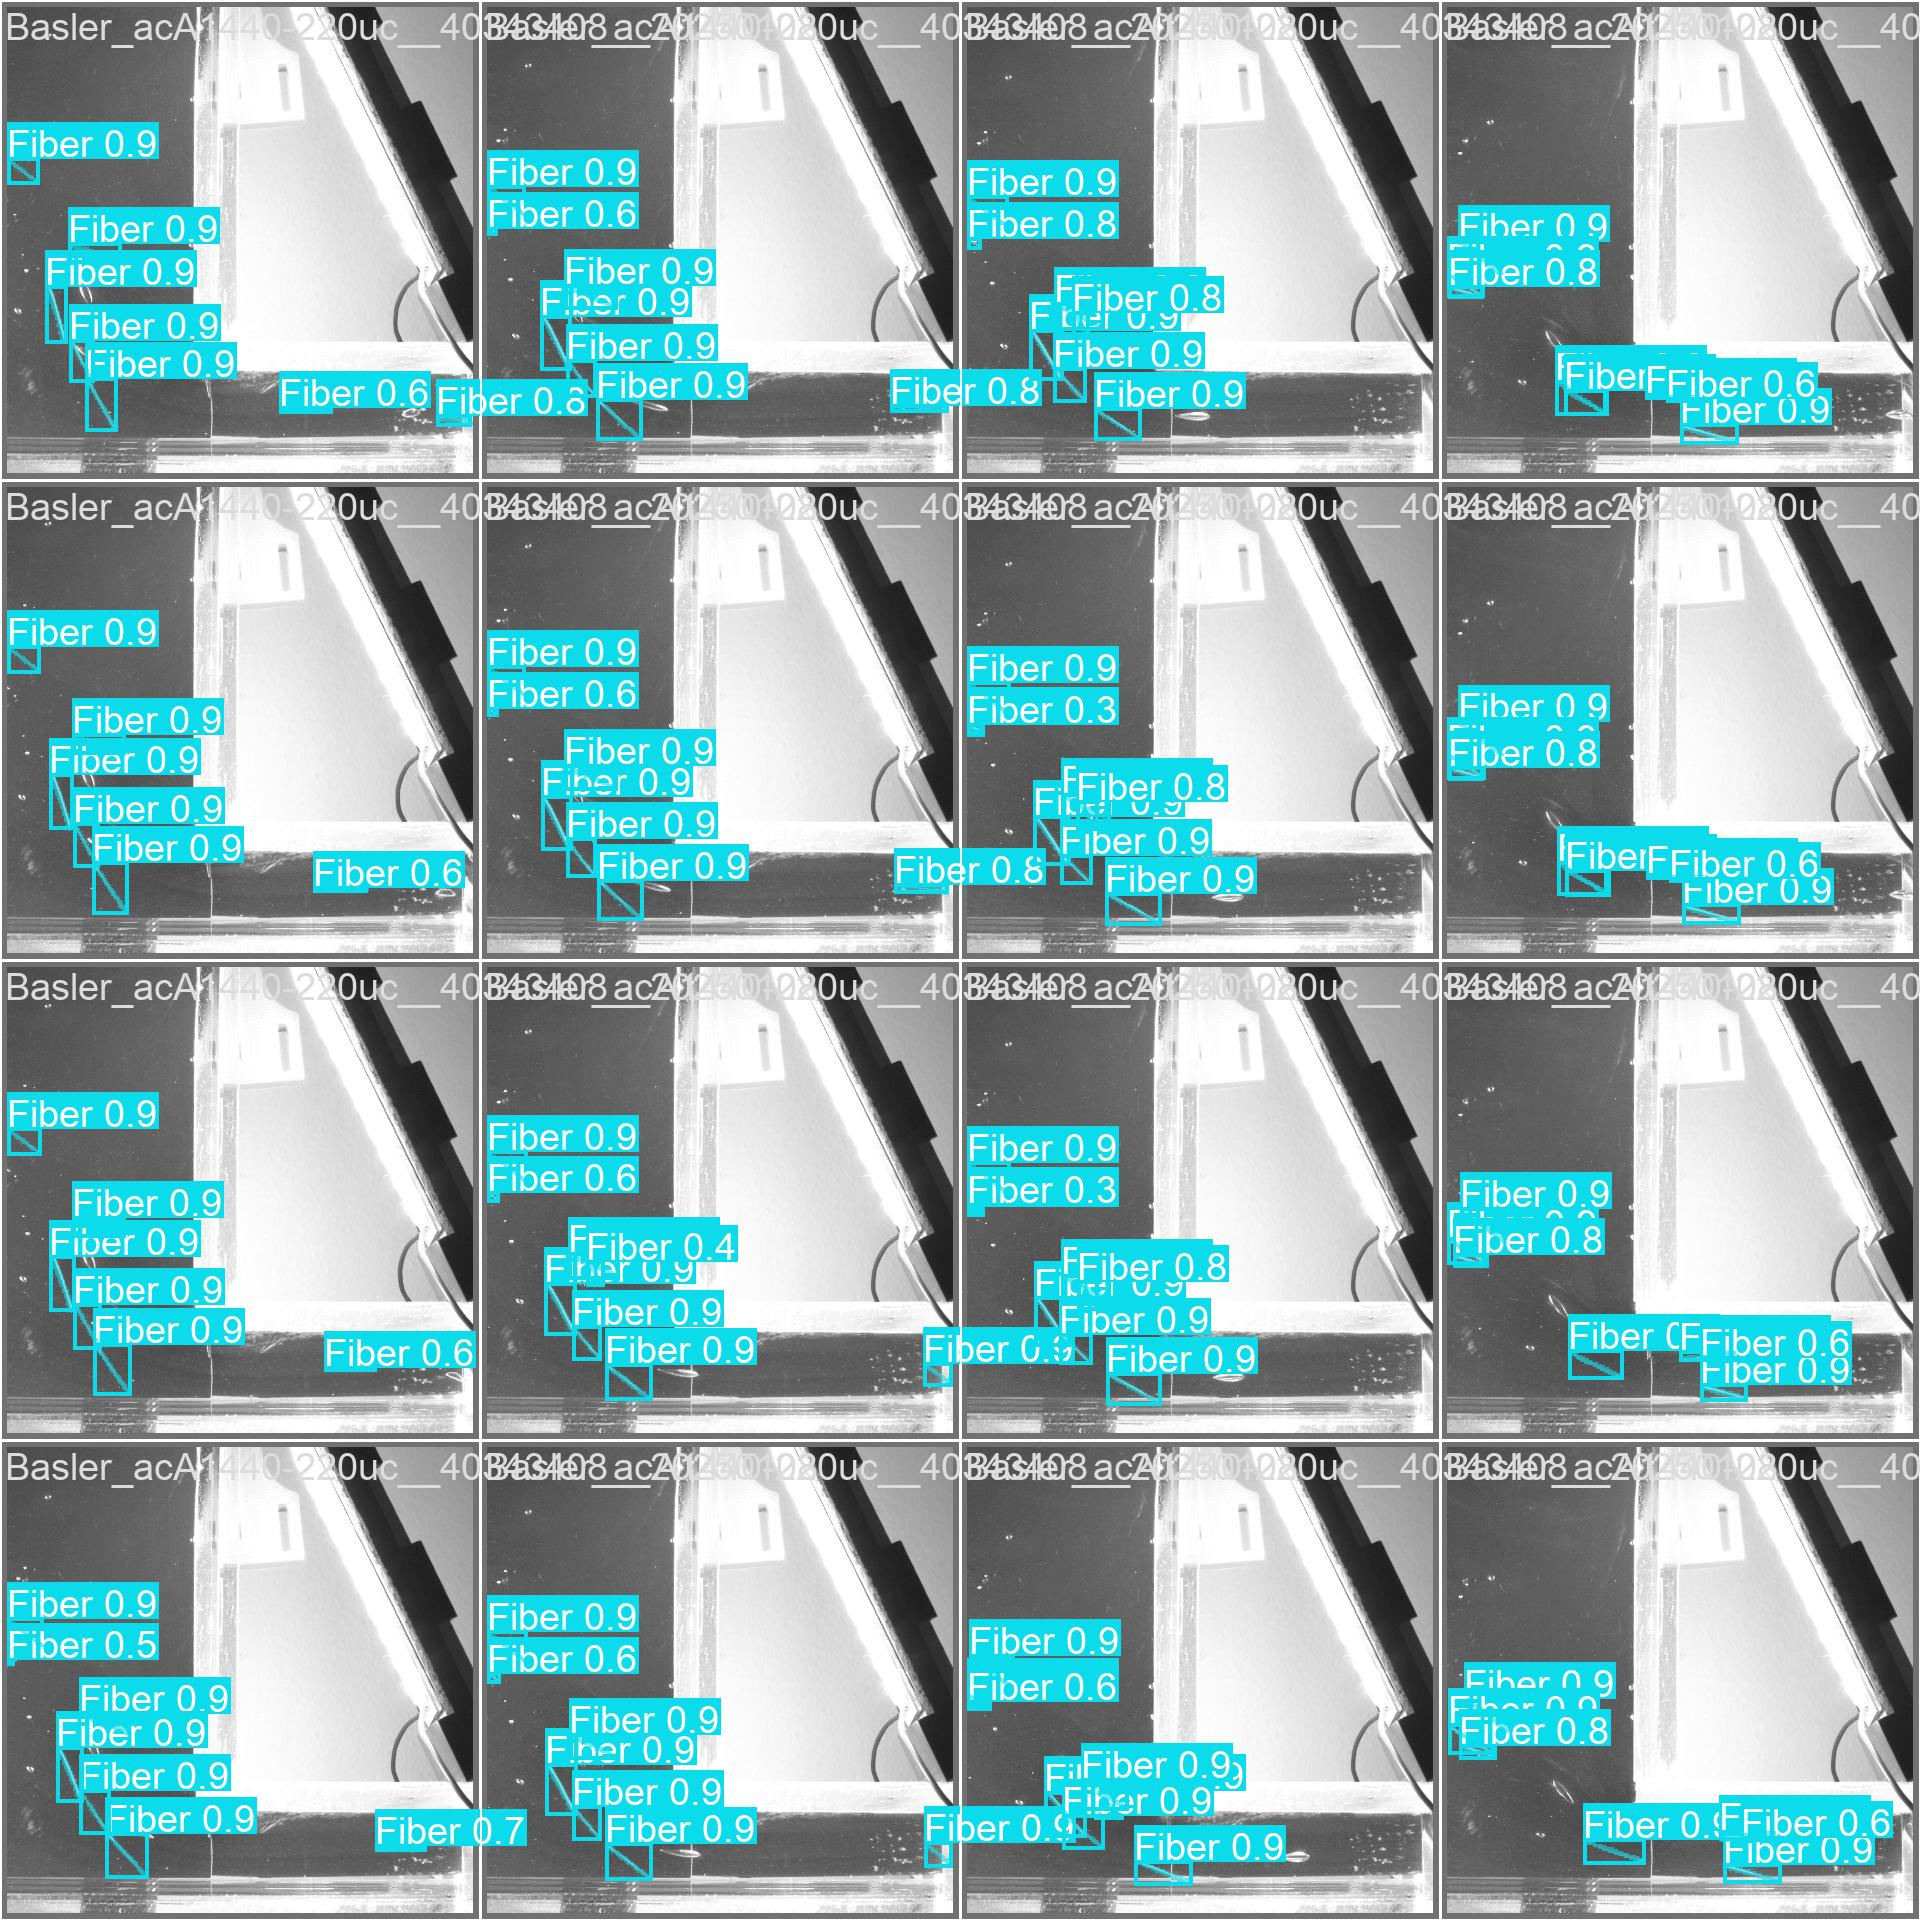

In [10]:
IPyImage(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)